<a href="https://colab.research.google.com/github/nnikolovskiii/machine-learning-with-graphs/blob/master/Karate_Club_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import networkx as nx

Zachary's karate club network

The [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) is a graph which describes a social network of 34 members of a karate club and documents links between members who interacted outside the club.**bold text**

In [50]:
#Loading the graph
G = nx.karate_club_graph()

type(G)

networkx.classes.graph.Graph

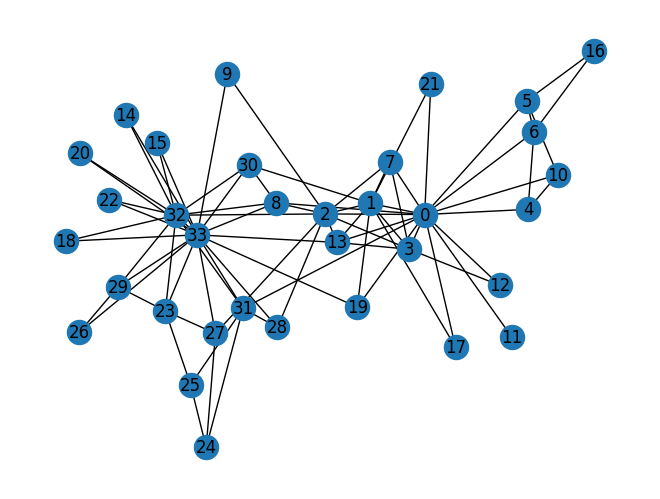

In [51]:
# Visualize the graph
nx.draw(G, with_labels = True)

In [52]:
import torch

#Edges and neg edge sampling

In [53]:
def graph_to_edge_list(G):
  # TODO: Implement the function that returns the edge list of
  # an nx.Graph. The returned edge_list should be a list of tuples
  # where each tuple is a tuple representing an edge connected
  # by two nodes.


  edge_list = list(G.edges)

  return edge_list

def edge_list_to_tensor(edge_list):
  # TODO: Implement the function that transforms the edge_list to
  # tensor. The input edge_list is a list of tuples and the resulting
  # tensor should have the shape [2, len(edge_list)].

  edge_index = torch.tensor(edge_list, dtype=torch.int64).t()


  return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print(pos_edge_index)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  4,
          4,  5,  5,  5,  6,  8,  8,  8,  9, 13, 14, 14, 15, 15, 18, 18, 19, 20,
         20, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 26, 26, 27, 28, 28, 29,
         29, 30, 30, 31, 31, 32],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  2,  3,
          7, 13, 17, 19, 21, 30,  3,  7,  8,  9, 13, 27, 28, 32,  7, 12, 13,  6,
         10,  6, 10, 16, 16, 30, 32, 33, 33, 33, 32, 33, 32, 33, 32, 33, 33, 32,
         33, 32, 33, 25, 27, 29, 32, 33, 25, 27, 31, 31, 29, 33, 33, 31, 33, 32,
         33, 32, 33, 32, 33, 33]])
The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535


"Negative" edges refer to the edges/links that do not exist in the graph. The term "negative" is borrowed from "negative sampling" in link prediction. It has nothing to do with the edge weights.

For example, given an edge (src, dst), you should check that neither (src, dst) nor (dst, src) are edges in the Graph. If these hold true, then it is a negative edge.

In [54]:
import random

def sample_negative_edges(G, num_neg_samples):
  # TODO: Implement the function that returns a list of negative edges.
  # The number of sampled negative edges is num_neg_samples. You do not
  # need to consider the corner case when the number of possible negative edges
  # is less than num_neg_samples. It should be ok as long as your implementation
  # works on the karate club network. In this implementation, self loops should
  # not be considered as either a positive or negative edge. Also, notice that
  # the karate club network is an undirected graph, if (0, 1) is a positive
  # edge, do you think (1, 0) can be a negative one?
  edge_list = graph_to_edge_list(G)
  neg_edge_list = []
  li = []

  # print(len(G.nodes()))


  for i in range(len(G.nodes())):
    for j in range(i+1, len(G.nodes())):
      if (i,j) not in edge_list and (j,i) not in edge_list:
        neg_edge_list.append((i,j))


  # print(neg_edge_list)
  for i in range(num_neg_samples):
    sampled_edge = random.choice(neg_edge_list)
    li.append(sampled_edge)
    neg_edge_list.remove(sampled_edge)

  return li

# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

The neg_edge_index tensor has shape torch.Size([2, 78])


Negative edges are added to balance the positive edges. They represent non-connection, and the model shoulduse both positive and negative edges for training, to correctly classify connections and non-connections, and based on the loss function to update is classification capabilities.

#Node embedding learning

Creating our embedding matrix

In [55]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [56]:
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
  # TODO: Implement this function that will create the node embedding matrix.
  # A torch.nn.Embedding layer will be returned. You do not need to change
  # the values of num_node and embedding_dim. The weight matrix of returned
  # layer should be initialized under uniform distribution.

  emb = None

  emb = nn.Embedding(num_node, embedding_dim)

  shape = emb.weight.data.shape

  emb.weight.data = torch.rand(shape)


  return emb

emb = create_node_emb()
ids = torch.LongTensor([0, 3])

# Print the embedding layer
print("Embedding: {}".format(emb))

# An example that gets the embeddings for node 0 and 3
print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[0.2114, 0.7335, 0.1433, 0.9647, 0.2933, 0.7951, 0.5170, 0.2801, 0.8339,
         0.1185, 0.2355, 0.5599, 0.8966, 0.2858, 0.1955, 0.1808],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward0>)


Here is the embedding matrix, each column represents a node

In [57]:
emb.weight.data

tensor([[2.1136e-01, 7.3349e-01, 1.4330e-01, 9.6468e-01, 2.9333e-01, 7.9514e-01,
         5.1703e-01, 2.8010e-01, 8.3389e-01, 1.1848e-01, 2.3546e-01, 5.5993e-01,
         8.9664e-01, 2.8577e-01, 1.9553e-01, 1.8079e-01],
        [2.7956e-01, 3.2728e-01, 3.8354e-01, 2.1556e-01, 6.5627e-01, 5.0406e-01,
         1.7332e-01, 2.1447e-01, 6.0588e-01, 4.9286e-01, 8.5387e-01, 4.2420e-01,
         9.4949e-02, 1.3019e-01, 3.5324e-01, 3.8926e-01],
        [5.5706e-01, 3.8786e-01, 6.8449e-01, 3.3371e-01, 8.6698e-01, 6.1484e-01,
         3.4628e-01, 9.4560e-01, 6.2765e-01, 1.6021e-01, 2.2173e-01, 8.1351e-01,
         7.2836e-01, 8.9040e-01, 4.6159e-01, 8.4971e-01],
        [7.4859e-01, 6.5463e-01, 3.8428e-01, 9.8199e-01, 6.0118e-01, 3.7099e-01,
         4.9289e-01, 9.9152e-01, 8.3583e-01, 4.6295e-01, 9.9018e-01, 7.1957e-01,
         2.3379e-01, 4.4966e-02, 7.9057e-01, 9.6892e-01],
        [2.0869e-01, 7.0536e-01, 5.2129e-01, 3.9309e-01, 3.6404e-01, 6.3910e-01,
         6.1023e-01, 8.3770e-01, 6.8304

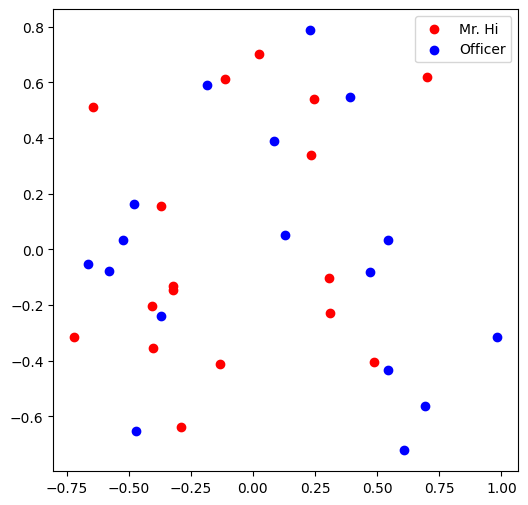

In [58]:
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

visualize_emb(emb)

#Simple Neural Network

We want to optimize our embeddings for the task of classifying edges as positive or negative. Given an edge and the embeddings for each node, the dot product of the embeddings, followed by a sigmoid, should give us the likelihood of that edge being either positive (output of sigmoid > 0.5) or negative (output of sigmoid < 0.5).

Note that we're using the functions you wrote in the previous questions, _as well as the variables initialized in previous cells_. If you're running into issues, make sure your answers to questions 1-6 are correct.

In [62]:
import torch
from torch.optim import SGD
import torch.nn as nn

def accuracy(pred, label):
    # Compute the accuracy by comparing the predicted values to the labels
    # Round predictions to 0 or 1 and compare them with the labels
    rounded_predictions = torch.round(pred)
    correct = (rounded_predictions == label).sum().item()
    accuracy = correct / label.size(0)
    return accuracy

def train(emb, loss_fn, train_label, train_edge, epochs=500, learning_rate=0.1):
    optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

    for epoch in range(epochs):
        # Get the embeddings of the nodes in train_edge
        node_v = emb(train_edge[0])
        node_u = emb(train_edge[1])

        # Dot product the embeddings between each node pair
        d_prod = (node_v * node_u).sum(dim=1)

        # Feed the dot product result into sigmoid
        output = torch.sigmoid(d_prod)

        # Feed the sigmoid output into the loss_fn
        loss = loss_fn(output, train_label)

        # Print both loss and accuracy of each epoch
        print(f"Epoch {epoch + 1}/{epochs} - Loss: {loss.item():.4f}, Accuracy: {accuracy(output, train_label):.4f}")

        # Update the embeddings using the loss and optimizer
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


loss_fn = nn.BCELoss()

#labels
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concat positive and negative edges into one tensor
# Assuming `pos_edge_index` and `neg_edge_index` are defined
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)

# Call the train function
train(emb, loss_fn, train_label, train_edge)


Epoch 1/500 - Loss: 0.0186, Accuracy: 1.0000
Epoch 2/500 - Loss: 0.0186, Accuracy: 1.0000
Epoch 3/500 - Loss: 0.0186, Accuracy: 1.0000
Epoch 4/500 - Loss: 0.0186, Accuracy: 1.0000
Epoch 5/500 - Loss: 0.0186, Accuracy: 1.0000
Epoch 6/500 - Loss: 0.0185, Accuracy: 1.0000
Epoch 7/500 - Loss: 0.0185, Accuracy: 1.0000
Epoch 8/500 - Loss: 0.0185, Accuracy: 1.0000
Epoch 9/500 - Loss: 0.0184, Accuracy: 1.0000
Epoch 10/500 - Loss: 0.0184, Accuracy: 1.0000
Epoch 11/500 - Loss: 0.0184, Accuracy: 1.0000
Epoch 12/500 - Loss: 0.0183, Accuracy: 1.0000
Epoch 13/500 - Loss: 0.0183, Accuracy: 1.0000
Epoch 14/500 - Loss: 0.0182, Accuracy: 1.0000
Epoch 15/500 - Loss: 0.0182, Accuracy: 1.0000
Epoch 16/500 - Loss: 0.0182, Accuracy: 1.0000
Epoch 17/500 - Loss: 0.0181, Accuracy: 1.0000
Epoch 18/500 - Loss: 0.0181, Accuracy: 1.0000
Epoch 19/500 - Loss: 0.0180, Accuracy: 1.0000
Epoch 20/500 - Loss: 0.0180, Accuracy: 1.0000
Epoch 21/500 - Loss: 0.0179, Accuracy: 1.0000
Epoch 22/500 - Loss: 0.0179, Accuracy: 1.00

In [60]:
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

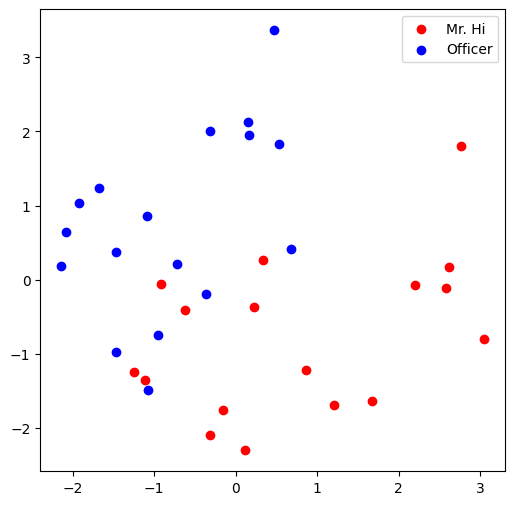

In [61]:
visualize_emb(emb)